# Analyzing the company's sales

- Let's use the kaggle 'Superstore Sales Dataset' available at:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
<br><br>
### What do we want to answer?
- How were **sales** during this period?
- What was the **best selling category**?
- What was the **best-selling item**?

### 1. Importing and Viewing the database
- Base: "database.csv"

In [1]:
# Importing the libraries and database
import pandas as pd
base = pd.read_csv("Superstore_Dataset.csv") 

### 2. Understanding and treating the database

In [10]:
# Viewing database information
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Only the postal code has null values, so we can see which lines don't have this value**

In [14]:
# Checking records with an empty Postal Code
base.loc[base["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**All the records without a postal code are from the city of Burlington, Vermont.**
<br>
**I wonder if any records from that city have a postal code.**

In [24]:
# Checking if there is any record of Burlington, Vermont with Postal Code
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


**We can go directly to google to find this information.**

![google_screen_shot.png](google_screen_shot.png)

In [47]:
# Updating this information
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull()), "Postal Code"] = 5401

In [48]:
# Viewing base information again
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [49]:
# Checking if there are any null values left
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


- If the 'Postal Code' column wasn't necessary, we could solve this problem by using drop.

In [50]:
# Example
base2 = base.drop('Postal Code', axis=1)

In [51]:
base2.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


### 3. <font color="yellow"> How were sales during this period? </font>
Here we have two questions to think about:
- **Which <font color="yellow">columns</font> are we going to use?**
    - We can check the sale in the "Sales" column.
    - The period we can use the "Order Date" column, but we need to understand this column better
- **Which <font color="yellow">period</font> do we want to display?**

In [52]:
# To understand the date, we can see which period we're talking about
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

**<font color="red">WARNING:</font> If the date column is in text format and not as a date, the sorting will be by text and not by date!**

**We can convert a column to a date using pandas's to_datetime**
<br><br>
base["column"] = pd.**to_datetime(**base["column"]**)**
- In datetime, if you only have the date, the time would be 00:00:00
- If we only want to consider the date, we can use **.date** from the **datetime** library.

In [53]:
import datetime as dt

In [54]:
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [55]:
# Converting date columns to datetime
base['Order Date'] = pd.to_datetime(base['Order Date'])
base['Ship Date'] = pd.to_datetime(base['Ship Date'])

In [56]:
# To understand the date, we can see which period we're talking about
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [57]:
# Searching for the maximum date
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- We're talking about 4 years of analysis, starting in Jan/2015 and going up to Dec/2018

#### Since we're talking about a long period of years, we can start visualizing the years
- To do this, we can use the **.year** from the datetime library to create a new column with just the year of that base

# Sales per year

In [59]:
# Creating a column with the year
base['year'] = base['Order Date'].dt.year

In [60]:
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017


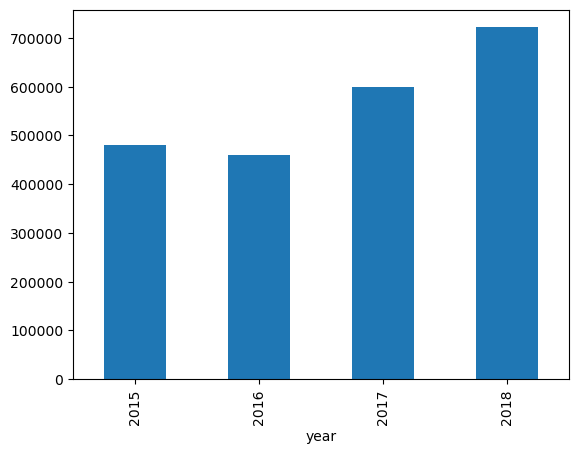

In [64]:
# Using this column in the group by and creating a bar plot
base.groupby('year')['Sales'].sum().plot.bar();

## Improving the look of this graphic
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
- Color suggestion: '#84ba5b'

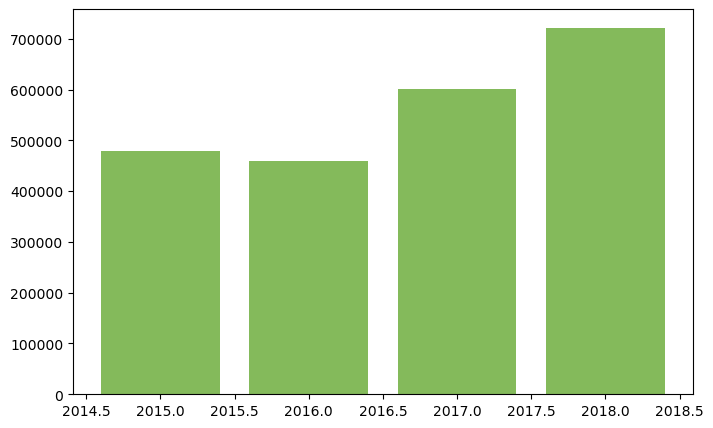

In [74]:
# Creating a graph with the matplotlib library and using groupby
import matplotlib.pyplot as plt
import numpy as np

# creating the variables
x = base.groupby('year')['Sales'].sum().index
y = base.groupby('year')['Sales'].sum().values

# plot
fig, ax = plt.subplots(figsize = (8,5))

ax.bar(x, y, linewidth=2.0, color='#84ba5b')

plt.show()
